In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data from the Y3 Gold catalog, the objects were classified as galaxies (EXTENDED_CLASS_MOF=3) & -50 < dec < -40
colors = pd.read_csv('source_colors.csv')
colors = colors.sort_values('DNF_ZMEAN_MOF')
colors.head()


,DNF_ZMEAN_MOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z
13634,-1.677571,24.251514,23.603352,23.394436,23.299051
5948,-1.012197,24.394253,23.996126,23.864374,22.998064
11086,-0.855519,99.000000,99.000000,99.000000,99.000000
29478,-0.832622,25.242546,24.461033,24.145453,99.000000
13145,-0.518157,24.689995,23.980837,23.773783,23.438921


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


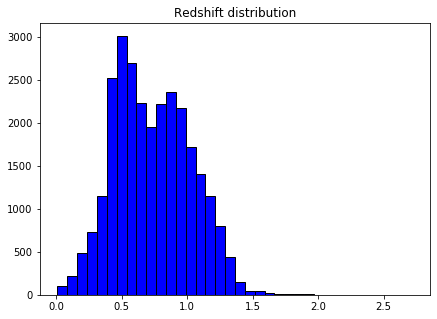

In [3]:
colors = colors[colors['DNF_ZMEAN_MOF'] > 0.01] #When there is no data z<0
colors = colors[colors['MAG_PSF_G'] < 30.] [colors['MAG_PSF_R'] < 30.] [colors['MAG_PSF_I'] < 30.] #decent magnitude
# Redshift distribution
plt.figure(figsize=(7,5))
plt.title('Redshift distribution')
plt.hist(colors['DNF_ZMEAN_MOF'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()

In [4]:
colors['g_r'] = colors['MAG_PSF_G'] - colors['MAG_PSF_R'] # g-r color
colors['r_i'] = colors['MAG_PSF_R'] - colors['MAG_PSF_I'] # r-i color
colors.head()

,DNF_ZMEAN_MOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z,g_r,r_i
26573,0.011249,14.738641,20.331640,20.578165,19.431105,-5.592999,-0.246525
16082,0.011788,22.277777,21.484489,21.187170,20.796904,0.793287,0.297319
19005,0.012198,21.683310,21.384144,21.148762,20.740501,0.299166,0.235382
9766,0.014300,20.701172,20.990299,21.050514,20.838163,-0.289127,-0.060215
25328,0.014593,25.226330,24.222033,23.502666,22.528326,1.004297,0.719366


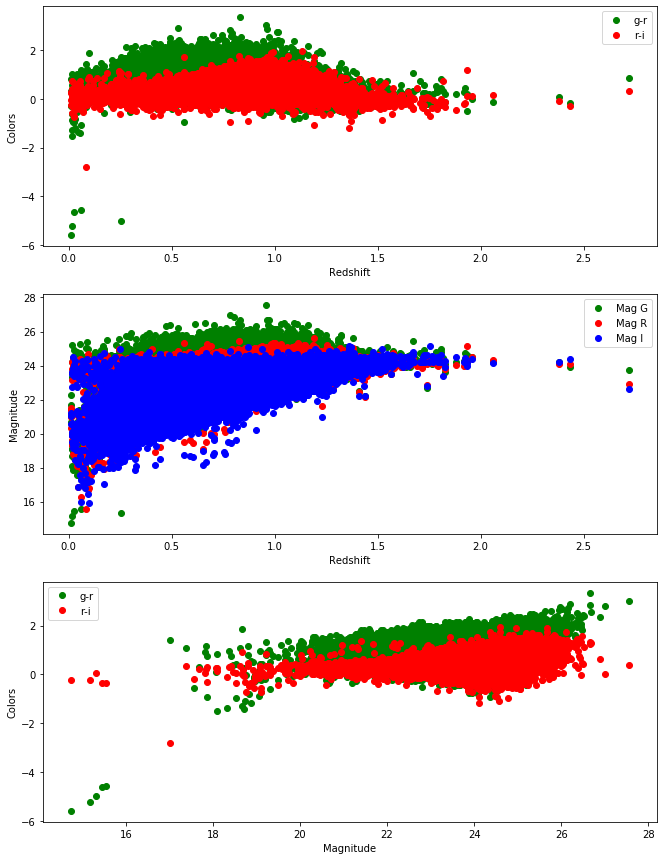

In [5]:
#Plots to see the distributions
plt.figure(figsize=(11,15))

plt.subplot(3, 1, 1)
plt.plot(colors['DNF_ZMEAN_MOF'], colors['g_r'], 'go', label='g-r')
plt.plot(colors['DNF_ZMEAN_MOF'], colors['r_i'], 'ro', label='r-i')
plt.xlabel('Redshift')
plt.ylabel('Colors')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(colors['DNF_ZMEAN_MOF'], colors['MAG_PSF_G'], 'go', label='Mag G')
plt.plot(colors['DNF_ZMEAN_MOF'], colors['MAG_PSF_R'], 'ro', label='Mag R')
plt.plot(colors['DNF_ZMEAN_MOF'], colors['MAG_PSF_I'], 'bo', label='Mag I')
plt.xlabel('Redshift')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(colors['MAG_PSF_G'], colors['g_r'], 'go', label='g-r')
plt.plot(colors['MAG_PSF_G'], colors['r_i'], 'ro', label='r-i')
plt.xlabel('Magnitude')
plt.ylabel('Colors')
plt.legend()

plt.show()

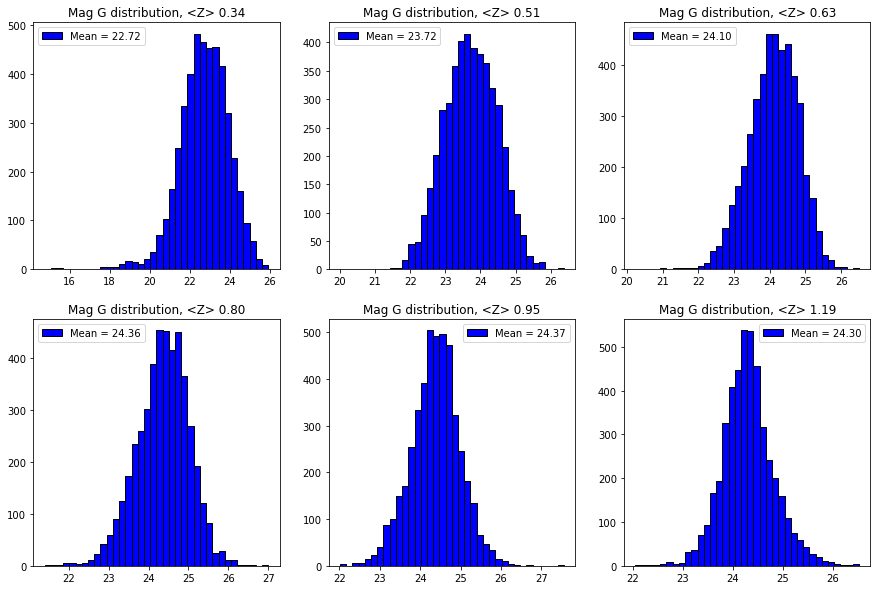

In [6]:
data = np.array_split(colors, 6)
plt.figure(figsize=(15,10))

for i in range(6):
    plt.subplot(2,3,i+1)
    zmean = np.mean(data[i]['DNF_ZMEAN_MOF'])
    mean = np.mean(data[i]['MAG_PSF_G'])
    plt.title('Mag G distribution, <Z> {:.2f}'.format(zmean))
    plt.hist(data[i]['MAG_PSF_G'], color = 'blue', edgecolor = 'black', 
             bins = int(180/5), label = 'Mean = {:.2f}'.format(mean))
    plt.legend()
plt.show()

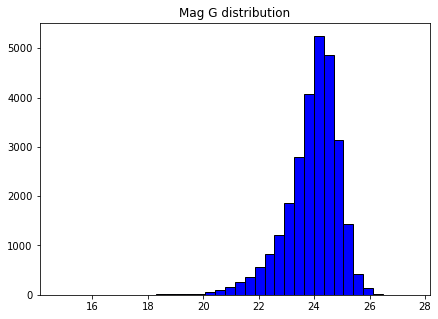

In [7]:
plt.figure(figsize=(7,5))
plt.title('Mag G distribution')
plt.hist(colors['MAG_PSF_G'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()

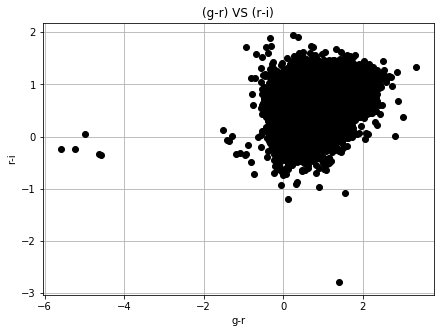

In [8]:
plt.figure(figsize=(7,5))
plt.plot(colors['g_r'], colors['r_i'], 'ko')
plt.title('(g-r) VS (r-i)')
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.grid()
plt.show()

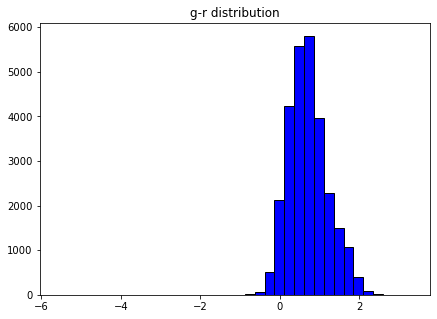

In [9]:
# g-r distribution
plt.figure(figsize=(7,5))
plt.hist(colors['g_r'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.title('g-r distribution')
plt.show()

In [10]:
dz = 0.1 # Range of redshift for filtering
dm = 0.2 # Range of magnitude for filtering

def magnitude_and_color_distribution(z, mmin = 20, mmax = 26):
    #objects with a redshift between z - dz and z + dz, same idea for apparent magnitude
    fcolors = colors[(colors['DNF_ZMEAN_MOF'] > z - dz)] [(colors['DNF_ZMEAN_MOF'] < z + dz)] 
    #getting a realistic magnitude for this redshift
    m = fcolors.sample()['MAG_PSF_G'].values[0]
    while(m > mmax or m < mmin):
        m = fcolors.sample()['MAG_PSF_G'].values[0]
    fcolors = fcolors[(colors['MAG_PSF_G'] > m - dm)] [(colors['MAG_PSF_G'] < m + dm)]
    random_object = fcolors.sample()
    m = random_object['MAG_PSF_G'].values[0]
    g_r = random_object['g_r'].values[0]
    r_i = random_object['r_i'].values[0]
    return(m, g_r, r_i)

In [11]:
# Example
z = 1
m, g_r, r_i = magnitude_and_color_distribution(z)
print(m, g_r, r_i)

24.62210083 -0.11857033000000072 1.0386562400000017


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
